In [2]:
import numpy as np
import matplotlib.pyplot as plt

The Vicsek model, introduced by Tamas Vicsek in 1995, is one of the fundamental models in the study of collision motion and collective behavior. The model simulates the motion of agents (particles) in a two-dimensional space, where each agent moves at a certain speed, adjusting its direction of motion based on the behavior of its neighbors. Vicesek's model is crucial in understanding such phenomena as the formation of swarms, flocks and other structures in nature.

**Parameters**
- N: Number of particles (agents).
- L: Size of the simulation space (L x L square).
- r: Neighborhood radius.
- eta $\eta$: Noise amplitude (range of random directional interference).
- v: Constant velocity.
- steps: Number of simulation time steps.
- dt: Time step length.
- store_trajectories: save positions after each step for simulation purposes.

In [3]:
def vicsek_simulation(N=300, L=7.0, r=1.0, eta=0.2, v=0.03, 
                      steps=500, dt=1.0, store_trajectories=True):
    """
      - all_positions[t] to pozycje wszystkich cząstek w chwili t
      - all_headings[t] to kierunki (kąty) wszystkich cząstek w chwili t
    """
    positions = L * np.random.rand(N, 2)             #  Array of shape (N, 2), where each pair (x, y) represents an agent's position in space.
    directions  = 2*np.pi * np.random.rand(N)          # Random directions [0, 2π)
    
    if store_trajectories:
        all_positions = [positions.copy()]
        all_directions  = [directions.copy()]
    else:
        all_positions = []
        all_directions  = []
    
    for step in range(steps):
        new_directions = np.zeros(N)
        
        # Dla każdej cząstki i oblicz nowy kąt
        for i in range(N):
            dx = positions[:,0] - positions[i,0]
            dy = positions[:,1] - positions[i,1]
            # uwzględnienie warunków brzegowych periodycznych (korekta na minimalną odległość)
            dx -= np.round(dx/L)*L
            dy -= np.round(dy/L)*L
            
            dist = np.sqrt(dx**2 + dy**2)
            neighbors = (dist < r)
            
            # Średni kierunek sąsiadów (wektorowy: sumujemy cos i sin)
            avg_sin = np.mean(np.sin(directions[neighbors]))
            avg_cos = np.mean(np.cos(directions[neighbors]))
            avg_angle = np.arctan2(avg_sin, avg_cos)
            
            # Szum losowy w przedziale [-eta/2, eta/2]
            noise = eta*(np.random.rand() - 0.5)
            new_directions[i] = avg_angle + noise
        
        # Aktualizacja headingów
        directions = new_directions
        
        # Aktualizacja pozycji
        positions[:,0] += v*np.cos(directions)*dt
        positions[:,1] += v*np.sin(directions)*dt
        
        # Warunki brzegowe periodyczne
        positions[:,0] %= L
        positions[:,1] %= L
        
        # Zapisanie, jeśli trzeba
        if store_trajectories:
            all_positions.append(positions.copy())
            all_directions.append(directions.copy())
        #print(all_positions)
        #print(all_directions)
    
    return all_positions, all_directions

In [ ]:
vicsek_simulation(N=10, L=7.0, r=1.0, eta=0.2, v=0.03, 
                      steps=10, dt=1.0, store_trajectories=True)

In [ ]:
def 

In [7]:
def plot_fig1_scenarios():
    """
    Odtwarza scenariusze z Rys. 1 w artykule, gdzie:
      (a) t=0, L=7, eta=2.0
      (b) L=25, eta=0.1
      (c) L=7, eta=2.0 (po pewnym czasie)
      (d) L=5, eta=0.1 (wysoka gęstość, mały szum -> stan uporządkowany)
      
    Przyjmujemy N=300, v=0.03 w każdym przypadku.
    """
    # Parametry wspólne
    N = 300
    v = 0.03
    r = 1.0
    steps = 300  # liczba kroków (można zwiększyć, by efekt był silniejszy)
    
    # Konfiguracje (a), (b), (c), (d)
    configs = [
        dict(L=7,  eta=2.0, desc="(a) L=7, eta=2.0, t=0"),
        dict(L=25, eta=0.1, desc="(b) L=25, eta=0.1"),
        dict(L=7,  eta=2.0, desc="(c) L=7, eta=2.0"),
        dict(L=5,  eta=0.1, desc="(d) L=5, eta=0.1"),
    ]
    
    fig, axes = plt.subplots(2,2,figsize=(10,10))
    axes = axes.ravel()
    
    for i, cfg in enumerate(configs):
        # Uruchamiamy symulację
        # Uwaga: dla (a) chcemy widzieć TYLKO stan początkowy (t=0),
        #        w pozostałych - stan "po czasie".
        if i == 0:
            # "t=0" -> odpalamy, ale narysujemy tylko początek.
            all_pos, all_head = vicsek_simulation(
                N=N, L=cfg['L'], r=r, eta=cfg['eta'], v=v, steps=1
            )
            step_to_plot = 0  # początek
        else:
            # (b), (c), (d) -> czekamy do końca
            all_pos, all_head = vicsek_simulation(
                N=N, L=cfg['L'], r=r, eta=cfg['eta'], v=v, steps=steps
            )
            step_to_plot = -1  # ostatnia klatka
        
        ax = axes[i]
        
        # Ostatnie 20 kroków trajektorii (lub odpowiednio mniej, jeśli symulacja krótka)
        last_n = 20
        t_min = max(0, len(all_pos)-last_n)
        for t in range(t_min, len(all_pos)):
            pos_t = all_pos[t]
            ax.plot(pos_t[:,0], pos_t[:,1], 'k.', alpha=0.02)  # kropki trajektorii
        
        # Rysujemy strzałki
        pos_final = all_pos[step_to_plot]
        head_final = all_head[step_to_plot]
        ax.quiver(
            pos_final[:,0], pos_final[:,1],
            np.cos(head_final), np.sin(head_final),
            angles='xy', scale_units='xy', scale=1.0, color='blue'
        )
        
        ax.set_xlim([0, cfg['L']])
        ax.set_ylim([0, cfg['L']])
        ax.set_aspect('equal', 'box')
        ax.set_title(cfg['desc'])
    
    plt.suptitle("Rys. 1 – przykładowa wizualizacja modelu Vicseka (N=300, v=0.03)")
    plt.tight_layout()
    plt.show()

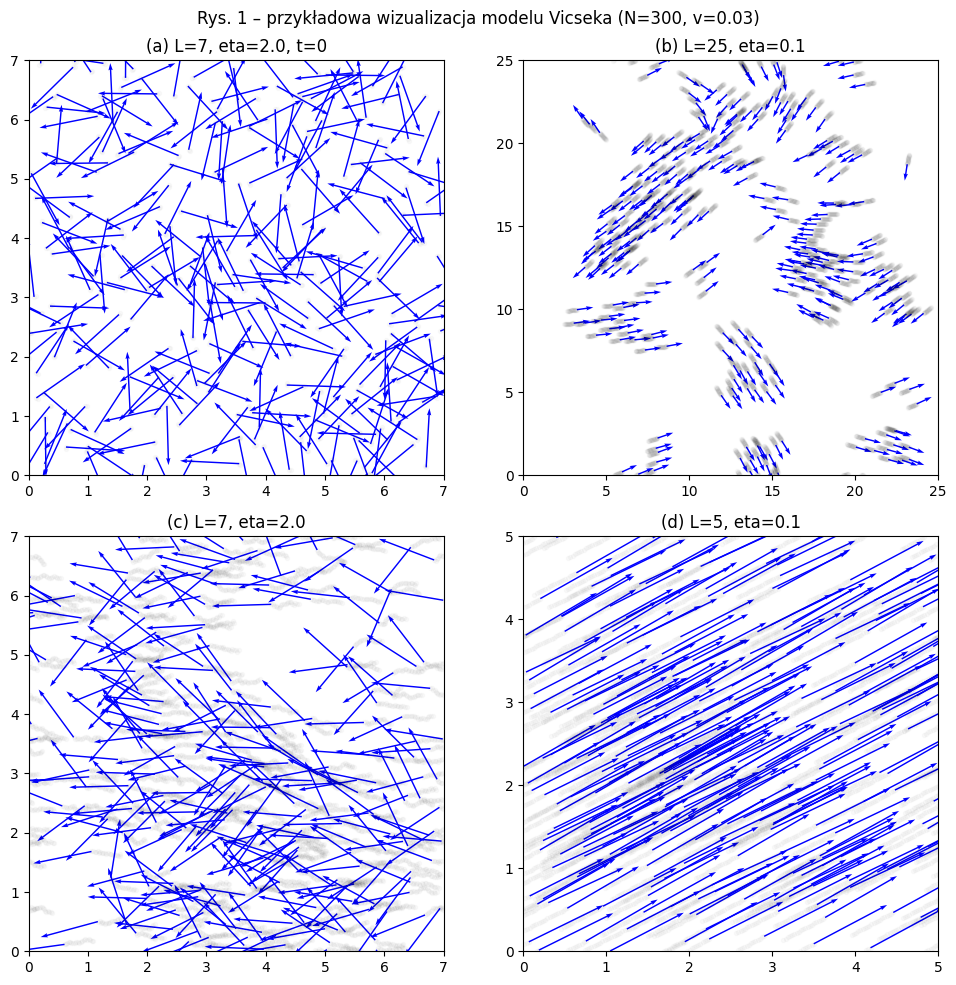

In [8]:
plot_fig1_scenarios()

---

Simulating N=100: 100%|████████████████████████████████████████████████████████████████| 50/50 [02:39<00:00,  3.18s/it]


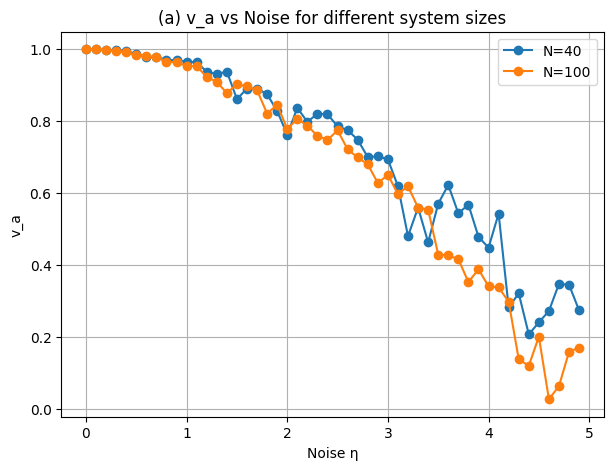

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def compute_va(positions, directions, v):
    """Computes the absolute value of the average normalized velocity v_a."""
    velocity_vectors = np.array([v * np.array([np.cos(theta), np.sin(theta)]) for theta in directions])
    mean_velocity = np.mean(velocity_vectors, axis=0)
    return np.linalg.norm(mean_velocity) / v

def run_vicsek_simulation(N, L, eta, v=0.03, r=1.0, steps=500):
    """Runs the Vicsek model and returns the final value of v_a."""
    positions = L * np.random.rand(N, 2)
    directions = 2 * np.pi * np.random.rand(N)
    
    for step in range(steps):
        new_directions = np.zeros(N)
        for i in range(N):
            dx = positions[:, 0] - positions[i, 0]
            dy = positions[:, 1] - positions[i, 1]
            dx -= np.round(dx / L) * L
            dy -= np.round(dy / L) * L
            dist = np.sqrt(dx**2 + dy**2)
            neighbors = (dist < r)
            avg_sin = np.mean(np.sin(directions[neighbors]))
            avg_cos = np.mean(np.cos(directions[neighbors]))
            avg_angle = np.arctan2(avg_sin, avg_cos)
            noise = eta * (np.random.rand() - 0.5)
            new_directions[i] = avg_angle + noise
        directions = new_directions
        positions[:, 0] = (positions[:, 0] + v * np.cos(directions)) % L
        positions[:, 1] = (positions[:, 1] + v * np.sin(directions)) % L
    return compute_va(positions, directions, v)

# Simulation parameters
eta_values = np.arange(0, 5, 0.1)
N_values = [40, 100 ] #400, 4000, 10000
L_values = [3.1, 5] # 10, 31.6, 50

density_fixed = [(N, L) for N, L in zip(N_values, L_values)]
va_results_a = {N: [run_vicsek_simulation(N, L, eta) for eta in tqdm(eta_values, desc=f"Simulating N={N}")] for N, L in density_fixed}

# Plot Figure 2(a)
plt.figure(figsize=(7, 5))
for N in N_values:
    plt.plot(eta_values, va_results_a[N], marker='o', label=f'N={N}')
plt.xlabel("Noise \u03B7")
plt.ylabel("v_a")
plt.legend()
plt.title("(a) v_a vs Noise for different system sizes")
plt.grid()
plt.show()

# # Figure 2(b) - Constant L=20, varying N
# N_density = [40, 100, 400, 4000, 10000]
# va_results_b = [run_vicsek_simulation(N, 20, 2.5) for N in N_density]

# density_values = np.array(N_density) / (20**2)
# plt.figure(figsize=(7, 5))
# plt.plot(density_values, va_results_b, marker='s', linestyle='-', label="L=20")
# plt.xlabel("Density (N/L^2)")
# plt.ylabel("v_a")
# plt.legend()
# plt.title("(b) v_a vs Density at constant L=20")
# plt.grid()
# plt.show()


In [4]:
def measure_order_parameter(N, L, r, eta, v=0.03, steps=1000, warmup=0):
    """
    Uruchamia model Vicseka i zwraca średni parametr porządku v_a
    po 'rozgrzaniu' (warmup).
    
    v_a = (1/N) |sum_i v_i|, gdzie v_i = (cos(theta_i), sin(theta_i))
    """
    # Uruchamiamy symulację i zbieramy headingi z ostatnich kroków.
    all_pos, all_head = vicsek_simulation(N=N, L=L, r=r, eta=eta, v=v, steps=steps)
    
    # Zakres kroków do uśrednienia (pomijamy okres rozgrzewania)
    sample_range = range(warmup, steps)  
    va_sum = 0.0
    count = 0
    
    for t in sample_range:
        heads_t = all_head[t]
        vx = np.cos(heads_t).sum()
        vy = np.sin(heads_t).sum()
        
        # Obliczenie modułu sumy wektorów prędkości
        va_t = np.sqrt(vx**2 + vy**2) / N
        va_sum += va_t
        count += 1
    
    # Średni parametr porządku
    va = va_sum / count
    return va

def plot_fig2():
    """
    Odtwarza schemat z Rys. 2:
    (a) v_a w funkcji eta dla różnych (N, L) przy stałej gęstości.
        Artykuł podaje zestaw:
         - N=40,   L=3.1
         - N=100,  L=5
         - N=400,  L=10
         - N=4000, L=31.6
         - N=10000,L=50
    (b) v_a w funkcji rosnącej gęstości (czyli rosnącego N), przy stałym L=20 i stałym szumie.
    """
    # --- (a) stała gęstość, różne rozmiary, v_a vs. eta ---
    # Zestaw (N, L) z artykułu
    systems = [
        (40,   3.1),
        #(100,  5.0)
    ]
    
    eta_values = np.arange(0.0, 5.0, 0.05)  # Możesz zwiększyć liczbę punktów dla gęstszej siatki
    
    plt.figure(figsize=(8,6))
    for (N, L) in systems:
        va_list = []
        for eta in eta_values:
            va = measure_order_parameter(N=N, L=L, r=1.0, eta=eta, steps=1200, warmup=0)
            va_list.append(va)
        plt.plot(eta_values, va_list, 'o-', label=f"N={N}, L={L}")
    
    plt.xlabel(r'$\eta$')
    plt.ylabel(r'$v_a$')
   #plt.title("Rys. 2(a) – $v_a$ vs $\eta$ (stała gęstość, różne (N, L))")
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 1.05)  # Ustawiamy zakres y od 0 do nieco powyżej 1 dla estetyki
    plt.show()

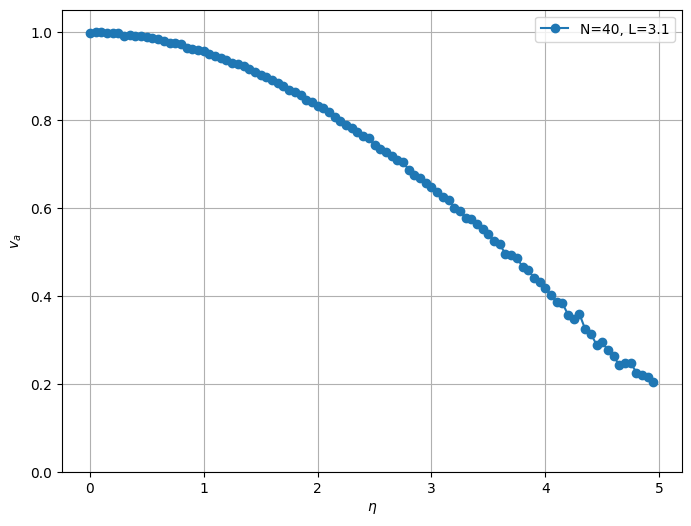

In [5]:
plot_fig2()